In [1]:
import pandas as pd                      # pandas is a dataframe library
import matplotlib.pyplot as plt          # matpoltlib.pypolt plots data
import numpy as np                       # numpy provides N-dim object support

# do plotting inline instead of in a separate window
%matplotlib inline

# Load and Review data with converting strings to integers

In [2]:
def conv_binary(cell):
    if(cell == 'satisfied' or cell == 'Loyal Customer' or cell == 'Male' or cell == 'Personal Travel' or cell == 'Eco'):
        return 1
    elif(cell == 'Eco Plus'):
        return 2
    else:
        return 0

In [4]:
#loading pima data. Adjust path if necessary
df = pd.read_excel("./satisfaction.xlsx", converters={
    "satisfaction_v2" : conv_binary,
    "Gender" : conv_binary,
    "Type of Travel" : conv_binary,
    "Class" : conv_binary,
    "Customer Type" : conv_binary
})

# df = pd.read_excel("./satisfaction.xlsx")

In [5]:
df.shape   # number of rows and number of cols

(129880, 24)

In [6]:
df.head(5)  # display data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [7]:
df.tail(15)   # dispay the end of the data

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129865,82526,1,0,0,59,1,1,2641,4,5,...,2,2,1,5,2,3,3,2,5,0.0
129866,51023,1,0,0,18,1,1,1243,5,0,...,2,2,4,5,5,3,5,2,0,0.0
129867,86234,1,0,0,30,1,1,1961,5,1,...,5,5,3,2,3,4,4,5,0,0.0
129868,8518,1,0,0,45,1,1,1612,5,2,...,2,2,2,5,4,3,4,2,0,0.0
129869,80330,1,0,0,55,1,1,1953,5,2,...,5,1,1,1,3,3,4,1,0,0.0
129870,22432,1,0,0,70,1,1,1674,5,4,...,5,5,3,2,4,5,4,5,54,46.0
129871,91851,1,0,0,35,1,1,3287,5,4,...,2,2,4,5,4,4,3,2,9,0.0
129872,41573,1,0,0,69,1,1,2240,5,4,...,4,4,5,4,4,3,4,4,4,0.0
129873,46936,1,0,0,63,1,1,1942,5,5,...,3,3,5,2,5,3,5,3,7,NaN
129874,53969,1,0,0,11,1,1,2752,5,5,...,2,2,3,5,3,5,4,2,5,0.0


In [8]:
df.isnull().values.any()   # check if there are any null values exist

True

In [12]:
df = df.dropna() # drop all nan values

In [13]:
df.isnull().values.any()   # check if there are any null values exist

False

In [15]:
df.shape

(129487, 24)

In [9]:
def plot_corr(df, size=24):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and Horizontal size of the plot
        
        Displays:
            matrix of correlation between columns.  darkblue-Blue-cyan-red-yellow => less to more correlated
                                                    0 -----------------> 1
                                                    Expect a darkred line running from top left to bottom right.
    """
    corr = df.corr()     # dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)   # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)   # draw y tick marks


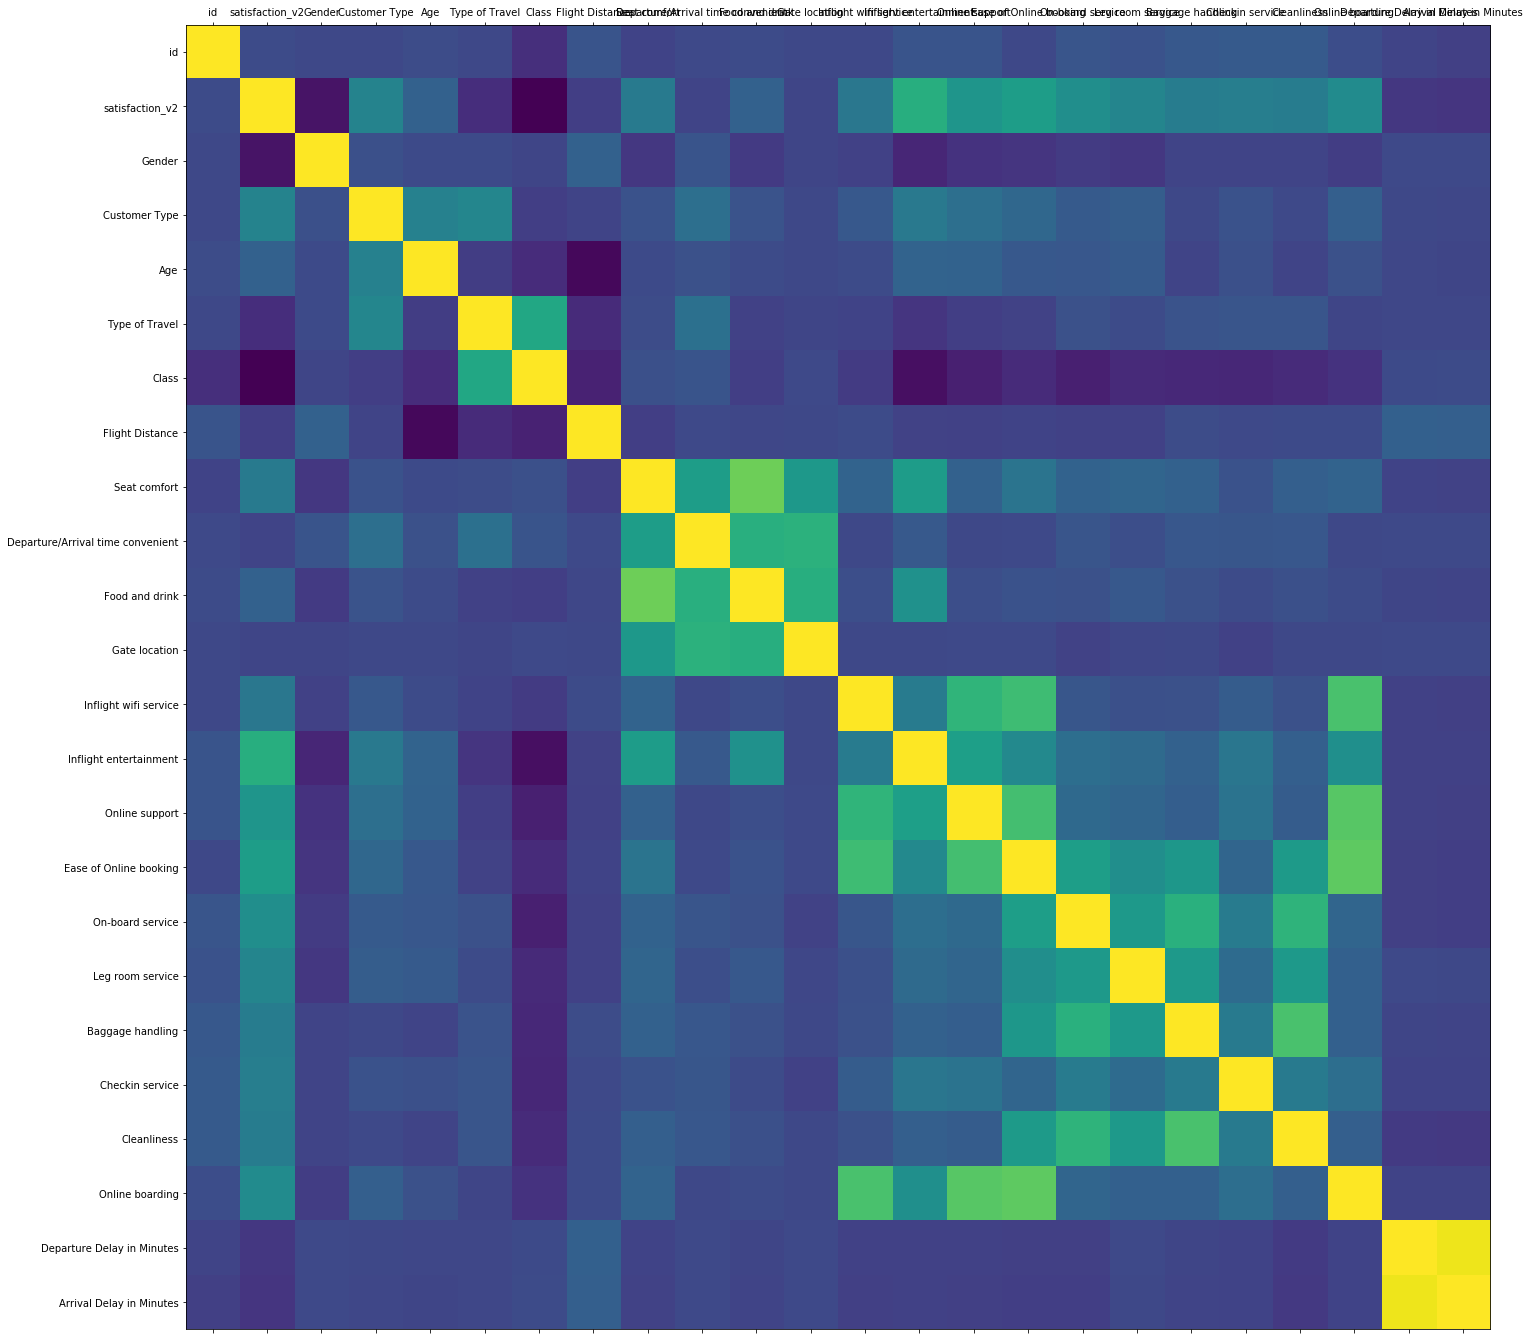

In [10]:
plot_corr(df)

## Renaming data labels to drop cols 


In [16]:
df.head()
df.rename(columns={"Food and drink":'FD',"Online boarding":'OB',
                   'Ease of Online booking':'EOOB','Online support':'OS',
                    'Baggage handling':'BH','Departure Delay in Minutes':'DDIM'}, inplace=True)

In [17]:
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,OS,EOOB,On-board service,Leg room service,BH,Checkin service,Cleanliness,OB,DDIM,Arrival Delay in Minutes
0,11112,1,0,1,65,1,1,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,1,1,1,47,1,0,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,1,0,1,15,1,1,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,1,0,1,60,1,1,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,1,0,1,70,1,1,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [18]:
# dropping cols
columns = ['FD', 'OB', 'EOOB','OS', 'BH', 'DDIM','id']
df.drop(columns, inplace = True, axis=1)

### issue to be solved please rename the labels

In [19]:
df.shape

(129487, 17)

In [20]:
df.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Gate location,Inflight wifi service,Inflight entertainment,On-board service,Leg room service,Checkin service,Cleanliness,Arrival Delay in Minutes
0,1,0,1,65,1,1,265,0,0,2,2,4,3,0,5,3,0.0
1,1,1,1,47,1,0,2464,0,0,3,0,2,4,4,2,3,305.0
2,1,0,1,15,1,1,2138,0,0,3,2,0,3,3,4,4,0.0
3,1,0,1,60,1,1,623,0,0,3,3,4,1,0,4,1,0.0
4,1,0,1,70,1,1,354,0,0,3,4,3,2,0,4,2,0.0


# check true and false ratio

In [21]:
num_true = len(df.loc[df['satisfaction_v2'] == True])   # satisfication statuses are true
num_false = len(df.loc[df['satisfaction_v2'] == False]) # satisfication statuses are false

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true,(num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false,(num_false/ (num_true + num_false)) * 100))


Number of True cases: 70882 (54.74%)
Number of False cases: 58605 (45.26%)


## splitting the data

In [22]:
df.rename(columns={'Customer Type':'Customer_Type','Type of Travel':'Type_of_Travel',
                   'Flight Distance':'Flight_Distance','Seat comfort':'Seat_comfort',
                  'Departure/Arrival time convenient':'Arival_time','Gate location':'Gate_location',
                  'Inflight wifi service':'Inflight_wifi_service',
                  'Inflight entertainment':'Inflight_entertainment',
                  'On-board service':'On_board_service', 'Leg room service':'Leg_room_service',
                  'Checkin service':'Checkin_service','Arrival Delay in Minutes':'Arrival_Delay_in_Minutes'}
          ,inplace=True)

In [23]:
df.head()

,satisfaction_v2,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Seat_comfort,Arival_time,Gate_location,Inflight_wifi_service,Inflight_entertainment,On_board_service,Leg_room_service,Checkin_service,Cleanliness,Arrival_Delay_in_Minutes
0,1,0,1,65,1,1,265,0,0,2,2,4,3,0,5,3,0.0
1,1,1,1,47,1,0,2464,0,0,3,0,2,4,4,2,3,305.0
2,1,0,1,15,1,1,2138,0,0,3,2,0,3,3,4,4,0.0
3,1,0,1,60,1,1,623,0,0,3,3,4,1,0,4,1,0.0
4,1,0,1,70,1,1,354,0,0,3,4,3,2,0,4,2,0.0


## 1. Naive Bayes Algorithm

In [25]:

#from sklearn.cross_validation import train_test_split ## Omar: it's deprecated 
from sklearn.model_selection import train_test_split

## Omar: Remove non categorical elements: ['Age', 'Flight_Distance']
feature_col_names = ['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 
                     'Class', 'Flight_Distance', 'Seat_comfort', 
                     'Arival_time','Gate_location','Inflight_wifi_service',
                    'Inflight_entertainment','On_board_service','Leg_room_service',
                    'Checkin_service','Cleanliness','Arrival_Delay_in_Minutes']
predicted_class_names = ['satisfaction_v2']


x = df[feature_col_names].values           # predictor feature columns (8 x m)
y = df[predicted_class_names].values       # predictor class (1 = true , 0 = false) column (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
                            # test_size = 0.3 is 30% , 42 is the answer to everything



In [26]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

70.00% in training set
30.00% in test set


In [27]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 1]), (len(df.loc[df['satisfaction_v2'] == 1]) / len(df.index))*100))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['satisfaction_v2'] == 0]), (len(df.loc[df['satisfaction_v2'] == 0]) / len(df.index))*100))
print("")
print("Training True : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100.0 )))
print("Training False : {0} ({1:0.3f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100.0 )))
print("")
print("Test True : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100.0 )))
print("Test Fasle : {0} ({1:0.3f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100.0 )))


Original True : 70882 (54.74%)
Original False : 58605 (45.26%)

Training True : 49674 (54.804%)
Training False : 40966 (45.196%)

Test True : 21208 (54.594%)
Test Fasle : 17639 (45.406%)


In [44]:
#from sklearn.preprocessing import Imputer    ## Omar: it's deprecated 
from sklearn.impute import SimpleImputer      # importing class imputer to replace zero missing values with mean values 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean", verbose=0)  # axis=0 -> col, verbose = axis

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [45]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performace metrix lib
from sklearn import metrics

#Accuracy
print("Accuracy on training data: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train))) # accuracy on training data

Accuracy on training data: 0.8072


In [49]:
# predict values using the test data
nb_predict_test = nb_model.predict(x_test)

# import the performace metrix lib
from sklearn import metrics

#Accuracy
print("Accuracy on testing data: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test))) # accuracy on testing data

Accuracy on testing data: 0.8063


In [50]:
print("Confucsion Matrix")   # left col predicted false , right predicted true
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confucsion Matrix
[[13545  4094]
 [ 3431 17777]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     17639
           1       0.81      0.84      0.83     21208

   micro avg       0.81      0.81      0.81     38847
   macro avg       0.81      0.80      0.80     38847
weighted avg       0.81      0.81      0.81     38847



## 2. Random Forest Algorithm

In [54]:
from sklearn.ensemble import RandomForestClassifier
# Create random forest object
rf_model = RandomForestClassifier(random_state=42, n_estimators=10)  # n_estimators will change from 10 in version 0.20 to 100 in 0.22
rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [56]:
# predict values using the training data
rf_predict_train = rf_model.predict(x_train)


#Accuracy
print("Accuracy on training data: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train))) # accuracy on training data

Accuracy on training data: 0.9961


In [57]:
# predict values using the test data
rf_predict_test = rf_model.predict(x_test)


#Accuracy
print("Accuracy on testing data: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test))) # accuracy on testing data

Accuracy on testing data: 0.9234


In [58]:
print("Confucsion Matrix")   # left col predicted false , right predicted true
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confucsion Matrix
[[16467  1172]
 [ 1805 19403]]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     17639
           1       0.94      0.91      0.93     21208

   micro avg       0.92      0.92      0.92     38847
   macro avg       0.92      0.92      0.92     38847
weighted avg       0.92      0.92      0.92     38847



## Data Visualization Bussiness Part ( skipped to be done in R language )

In [70]:
# Visualizing Gender satisification of the 
# 

'''
dataset_satisification_Gender = df[df["satisfaction_v2"] == 1]
dataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")
'''

'\ndataset_satisification_Gender = df[df["satisfaction_v2"] == 1]\ndataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")\n'

In [69]:
# Visualizing Gender dissatisification of the 
# 
'''
dataset_satisification_Gender = df[df["satisfaction_v2"] == 0]
dataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")
'''



'\ndataset_satisification_Gender = df[df["satisfaction_v2"] == 0]\ndataset_satisification_Gender.Gender.value_counts(normalize = False).plot.bar(title="satisifaction level")\n'

In [68]:
#groupByCleanliness = df.groupby("Cleanliness")

## Exporting data to a csv form

In [63]:
df.to_csv(r'Passenger_satisfaction_processed.csv')